## Logistic Regression - COVID-19

### Group Members
- Ramya Prakash
- Soumyadip Mitra
- Kirk Mason (James Mason)
- Hari Chamlagai
- Phil Nguyen

### Introductory Paragraph:

##### Link to the story: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [1]:
## Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Read the data
data = pd.read_csv("COVID-19_Daily_Testing.csv")

In [3]:
## Examine first few rows
data.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,...,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,...,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,...,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,...,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,...,1,8,7,0,2,0,1,2,1,9


In [4]:
## Summary of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
Date                                            88 non-null object
Day                                             88 non-null object
Tests                                           89 non-null object
Cases                                           89 non-null object
People Not-Positive - Total                     89 non-null object
People Tested - Age 0-17                        89 non-null int64
People Tested - Age 18-29                       89 non-null object
People Tested - Age 30-39                       89 non-null object
People Tested - Age 40-49                       89 non-null int64
People Tested - Age 50-59                       89 non-null int64
People Tested - Age 60-69                       89 non-null int64
People Tested - Age 70-79                       89 non-null int64
People Tested - Age 80+                         89 non-null int64
People Tested - Age Unknown     

In [5]:
## Clean data
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')
data['People Not-Positive - Total'] = data['People Not-Positive - Total'].str.replace(',','')
data['People Tested - Age 18-29'] = data['People Tested - Age 18-29'].str.replace(',','')
data['People Tested - Age 30-39'] = data['People Tested - Age 30-39'].str.replace(',','')
data['People Tested - Female'] = data['People Tested - Female'].str.replace(',','')
data['People Tested - Male'] = data['People Tested - Male'].str.replace(',','')
data['People Tested - Latinx'] = data['People Tested - Latinx'].str.replace(',','')
data['People Tested - Unknown Race/Ethnicity'] = data['People Tested - Unknown Race/Ethnicity'].str.replace(',','')
data['People Not-Positive - Age 18-29'] = data['People Not-Positive - Age 18-29'].str.replace(',','')
data['People Not-Positive - Female'] = data['People Not-Positive - Female'].str.replace(',','')
data['People Not-Positive - Male'] = data['People Not-Positive - Male'].str.replace(',','')
data['People Not-Positive - Unknown Race/Ethnicity'] = data['People Not-Positive - Unknown Race/Ethnicity'].str.replace(',','')

data['Cases'] = pd.to_numeric(data['Cases'])     
data['Tests'] = pd.to_numeric(data['Tests'])
data['People Not-Positive - Total'] = pd.to_numeric(data['People Not-Positive - Total'])
data['People Tested - Age 18-29'] = pd.to_numeric(data['People Tested - Age 18-29'])
data['People Tested - Age 30-39'] = pd.to_numeric(data['People Tested - Age 30-39'])
data['People Tested - Female'] = pd.to_numeric(data['People Tested - Female'])
data['People Tested - Male'] = pd.to_numeric(data['People Tested - Male'])
data['People Tested - Latinx'] = pd.to_numeric(data['People Tested - Latinx'])
data['People Tested - Unknown Race/Ethnicity'] = pd.to_numeric(data['People Tested - Unknown Race/Ethnicity'])
data['People Not-Positive - Age 18-29'] = pd.to_numeric(data['People Not-Positive - Age 18-29'])
data['People Not-Positive - Female'] = pd.to_numeric(data['People Not-Positive - Female'])
data['People Not-Positive - Male'] = pd.to_numeric(data['People Not-Positive - Male'])
data['People Not-Positive - Unknown Race/Ethnicity'] = pd.to_numeric(data['People Not-Positive - Unknown Race/Ethnicity'])

In [8]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc2e9f5ff80> (for post_execute):


KeyboardInterrupt: 

<Figure size 1440x720 with 0 Axes>

Error in callback <function flush_figures at 0x7fc2e9f6b3b0> (for post_execute):


KeyboardInterrupt: 

In [6]:
# Scale the data
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)

The linear model is: Y = 97.777 + 0.18572X


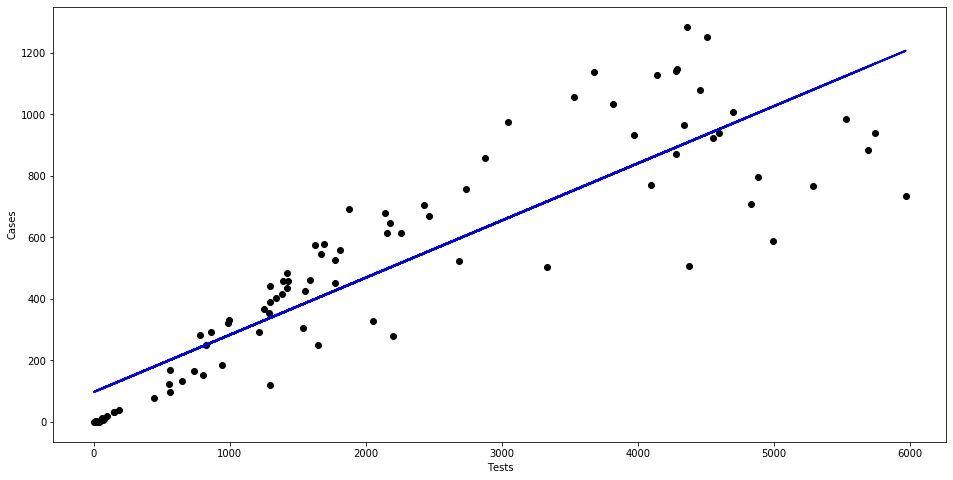

In [7]:
# Linear Regression
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

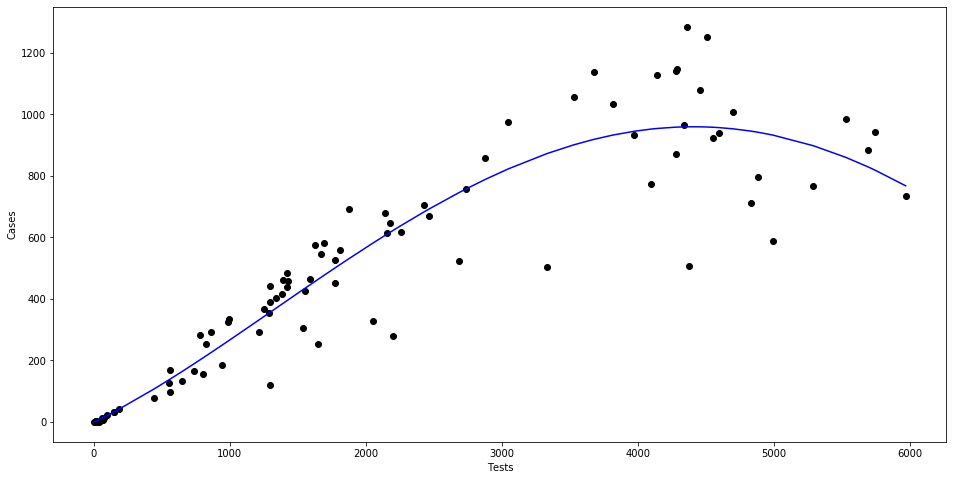

In [8]:
# Polynomial Regression
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

#### Question 1: If you were asked to perform the analysis on other states such as North Carlolina, can you obtain the data?

##### Answer:

#### Question 2: Are there any problems with state level data or is it all reported in exactly the same way?

##### Answer: 